In [2]:
import numpy as np
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=10000, noise=0.5)

In [5]:
X_centered = X - X.mean(axis=0)

In [8]:
U, s, Vt = np.linalg.svd(X_centered)

In [28]:
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [29]:
W2 = Vt.T[:, :2]

In [30]:
X2D = X_centered.dot(W2)

In [32]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=1)

In [49]:
X1D = pca.fit_transform(X)

In [50]:
pca.components_

array([[-0.94557265,  0.32541106]])

In [51]:
pca.explained_variance_ratio_

array([0.71603328])

In [52]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [53]:
X, X_recovered

(array([[ 0.52367989,  0.14800564],
        [-0.04375683,  0.59248793],
        [ 1.58359396, -0.28819891],
        ...,
        [ 0.09512321, -0.00734349],
        [ 0.95618704, -0.86080259],
        [-0.08485451,  0.14932303]]),
 array([[ 0.52367989,  0.14800564],
        [-0.04375683,  0.59248793],
        [ 1.58359396, -0.28819891],
        ...,
        [ 0.09512321, -0.00734349],
        [ 0.95618704, -0.86080259],
        [-0.08485451,  0.14932303]]))

In [55]:
from sklearn.decomposition import IncrementalPCA

In [58]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=1)

In [59]:
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

In [60]:
X_reduced = inc_pca.transform(X)

In [62]:
from sklearn.decomposition import KernelPCA

In [63]:
rbf_pca = KernelPCA(n_components=1, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [64]:
X_reduced

array([[-0.01439431],
       [ 0.17601958],
       [-0.31941663],
       ...,
       [ 0.08343417],
       [-0.21420273],
       [ 0.14501282]])

In [70]:
from sklearn.manifold import LocallyLinearEmbedding

In [71]:
lle = LocallyLinearEmbedding(n_components=1, n_neighbors=10)

In [72]:
X_reduced = lle.fit_transform(X)

In [76]:
from sklearn.datasets import fetch_openml

In [77]:
mnist = fetch_openml('mnist_784', version=1)

In [78]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [79]:
X, y = mnistist['data'], mnist['target']

In [80]:
X.shape

(70000, 784)

In [81]:
y.shape

(70000,)

In [89]:
X_train, X_test, y_train, y_test = X[:60000].values, X[60000:].values, y[:60000].astype(int).ravel(), y[60000:].astype(int).ravel() 

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
RF_full = RandomForestClassifier(n_jobs=-1, random_state=42)

In [87]:
RF_full.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [90]:
np.mean(RF_full.predict(X_test) == y_test)

0.9705

In [91]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=0.95)

In [96]:
X_reduced = pca.fit_transform(X_train)

In [99]:
RF_reduced = RandomForestClassifier(n_jobs=-1, random_state=42)

In [100]:
RF_reduced.fit(X_reduced, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [101]:
X_test_reduced = pca.transform(X_test)

In [102]:
np.mean(RF_reduced.predict(X_test_reduced) == y_test)

0.9481

In [103]:
from sklearn.manifold import TSNE

In [105]:
tsne = TSNE(n_components=2)

In [108]:
X_ts_reduced = tsne.fit_transform(X_train[:10000])

In [110]:
%matplotlib inline

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

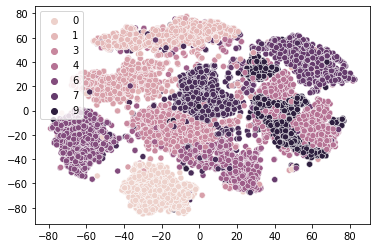

In [118]:
sns.scatterplot(x=X_ts_reduced[:,0], y=X_ts_reduced[:,1], hue=y_train[:10000])